In [ ]:
# Assignment 4.2 - ( 3.1,3.2,4.1&4.2)
## Justin Wisniewski

In [3]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/first.py")


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz"
)

In [4]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dat.gz")

In [5]:
import numpy as np

In [6]:
import nsfg
import first
import thinkstats2
import thinkplot

In [7]:
resp = nsfg.ReadFemResp()

In [ ]:
# Exercise 3-1

In [8]:
# Use the NSFG respondent variable numkdhh

pmf = thinkstats2.Pmf(resp.numkdhh, label="numkdhh")

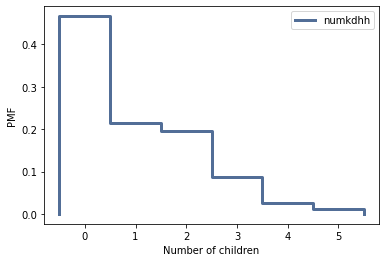

In [9]:
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel="Number of children", ylabel="PMF")

In [32]:
## Function to find Biased PMF
def BiasPmf(pmf, label=''):

    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)

    new_pmf.Normalize()
    return new_pmf

In [12]:
biased = BiasPmf(pmf, label="biased")

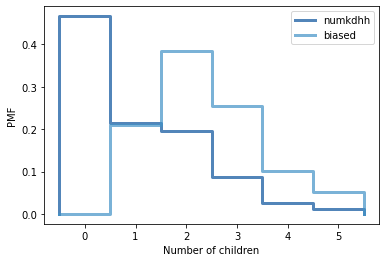

In [13]:
# Plot actual and biased distributions

thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased])
thinkplot.Config(xlabel="Number of children", ylabel="PMF")

In [14]:
pmf.Mean()

1.024205155043831

In [15]:
biased.Mean()

2.403679100664282

In [ ]:
# Exercise 3-2

In [16]:
# Compute mean of PMF
def PmfMean(pmf):

    return sum(p * x for x, p in pmf.Items())

In [18]:
# Computes the variance of a PMF
def PmfVar(pmf, mu=None):

    if mu is None:
        mu = PmfMean(pmf)

    return sum(p * (x - mu) ** 2 for x, p in pmf.Items())

In [ ]:
# Exercise 4-1

In [22]:
# Load data from the NSFG 

import first

live, firsts, others = first.MakeFrames()

In [23]:
# Compute the distribution of birth weight for first babies and others

first_wgt = firsts.totalwgt_lb
first_wgt_dropna = first_wgt.dropna()
print('Firsts', len(first_wgt), len(first_wgt_dropna))
 
other_wgt = others.totalwgt_lb
other_wgt_dropna = other_wgt.dropna()
print('Others', len(other_wgt), len(other_wgt_dropna))

first_pmf = thinkstats2.Pmf(first_wgt_dropna, label='first')
other_pmf = thinkstats2.Pmf(other_wgt_dropna, label='other')

Firsts 4413 4363
Others 4735 4675


In [24]:
def PercentileRank(scores, your_score):
    count = 0
    for score in scores:
        if score <= your_score:
            count += 1

    percentile_rank = 100.0 * count / len(scores)
    return percentile_rank

In [25]:
def Percentile(scores, percentile_rank):
    scores.sort()
    for score in scores:
        if PercentileRank(scores, score) >= percentile_rank:
            return score

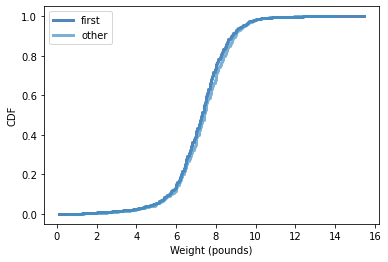

In [26]:
first_cdf = thinkstats2.Cdf(firsts.totalwgt_lb, label='first')
other_cdf = thinkstats2.Cdf(others.totalwgt_lb, label='other')

thinkplot.PrePlot(2)
thinkplot.Cdfs([first_cdf, other_cdf])
thinkplot.Config(xlabel='Weight (pounds)', ylabel='CDF')

In [28]:
# Solution for personal weight at birth, second child

other_cdf.PercentileRank(7.8)

63.101604278074866

In [ ]:
# Exercise 4-2

In [ ]:
# Generate 1000 numbers to then plot PMF

t = np.random.random(1000)

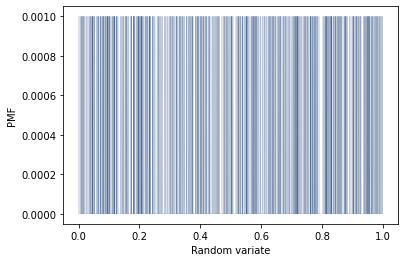

In [30]:
# PMF

pmf = thinkstats2.Pmf(t)
thinkplot.Pmf(pmf, linewidth=0.1)
thinkplot.Config(xlabel='Random variate', ylabel='PMF')

In [ ]:
# Solution
## The problem with the PMF plotting is with a value as large as 1000, it simply is too many values.

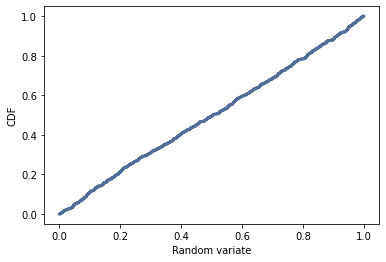

In [31]:
cdf = thinkstats2.Cdf(t)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Random variate', ylabel='CDF')

In [ ]:
# Solution
## The CDF is approximately a straight line, which means that the distribution is uniform.